In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load tab-delimited text file into a DataFrame
df_x = pd.read_csv('expression_with_real_gene_names.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_x.head()

First few rows of the DataFrame:


,Unnamed: 0,VPS13A_AS1,UBE2Q2P3,UBE2Q2P2,HMGB1P1,TIMM23B,MOXD2P,LOC155060,RNU12_2P,SSX9P,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
# Load tab-delimited text file into a DataFrame
df_y = pd.read_csv('Data/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_y.head()

First few rows of the DataFrame:


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [4]:
df = pd.merge(df_x, df_y)
df.head()

,Unnamed: 0,VPS13A_AS1,UBE2Q2P3,UBE2Q2P2,HMGB1P1,TIMM23B,MOXD2P,LOC155060,RNU12_2P,SSX9P,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [5]:
df = df.drop(df.columns[0], axis=1)
df.head()

,VPS13A_AS1,UBE2Q2P3,UBE2Q2P2,HMGB1P1,TIMM23B,MOXD2P,LOC155060,RNU12_2P,SSX9P,CSN1S2BP,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/2102135247.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm', alpha=0.7)


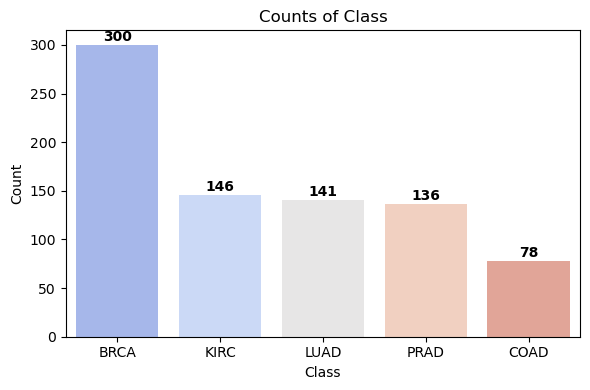

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the column for which you want to plot the counts
column_name = 'Class'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()
print(value_counts)

# Plot the value counts using seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='coolwarm', alpha=0.7)

# Add count labels on top of each bar
for i, value in enumerate(value_counts.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Counts of Cancer Class.png", dpi=300, bbox_inches='tight')
plt.show()

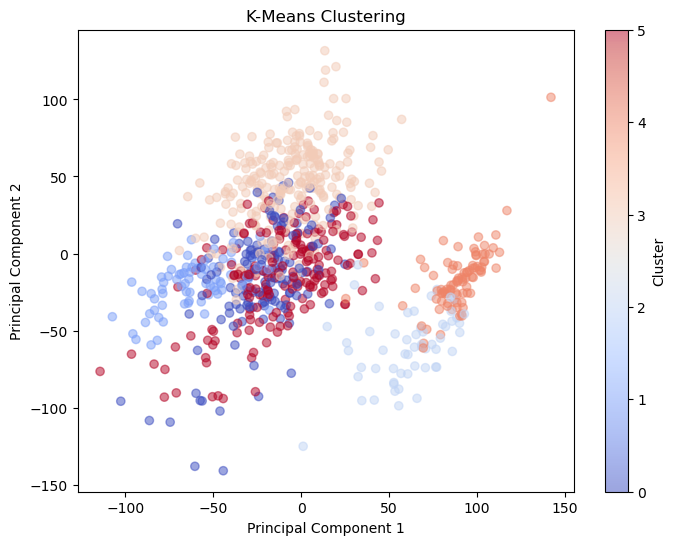

In [7]:
# Drop the 'Unnamed: 0' column (optional: if it's an ID or index)
df_x = df.drop(columns=['Class'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters  # previously you had a variable name mismatch

# Visualize the clusters in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.savefig("K-Means clustering.png", dpi=300, bbox_inches='tight')
plt.show()

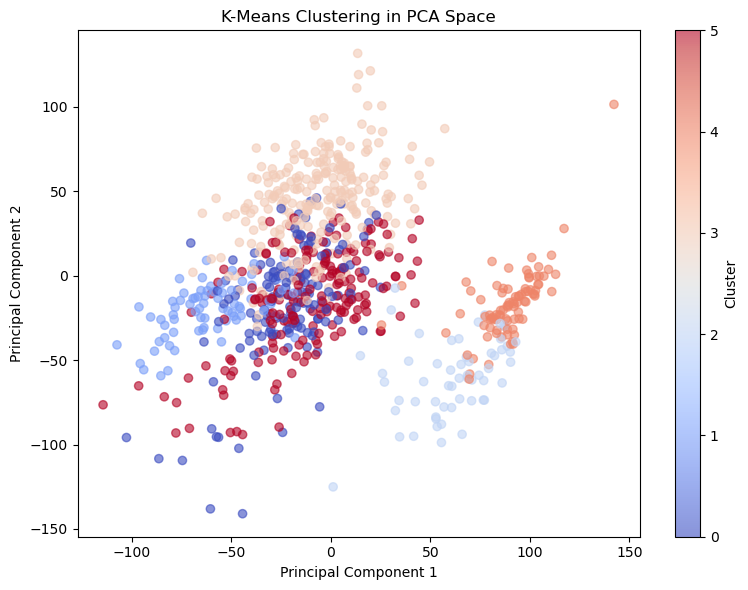

Cluster-Class Counts:
 Class    BRCA  COAD  KIRC  LUAD  PRAD
Cluster                              
0           1     0     0     0   134
1           0    74     0     0     0
2           0     0    57     0     0
3         253     0     0     2     1
4           0     0    88     0     0
5          46     4     1   139     1
Cluster to Class Mapping: {0: 'PRAD', 1: 'COAD', 2: 'KIRC', 3: 'BRCA', 4: 'KIRC', 5: 'LUAD'}


AttributeError: module 'matplotlib.pyplot' has no attribute 'ti'

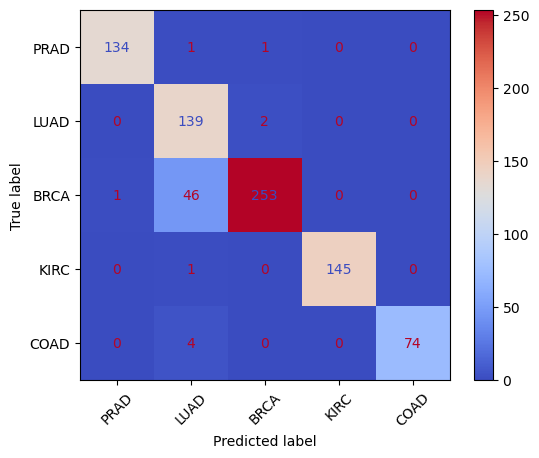

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === Step 1: Data Preprocessing ===
# Drop 'Unnamed: 0' if present
df_x = df.drop(columns=['Class', 'Unnamed: 0'], errors='ignore')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# === Step 2: PCA (for visualization only) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === Step 3: KMeans Clustering ===
n_clusters = 6  # Adjust based on your number of cancer types
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters

# === Step 4: Visualize Clusters in PCA Space ===
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering in PCA Space')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.savefig("K-Means_clustering_PCA.png", dpi=300)
plt.show()

# === Step 5: Assign Cluster to Most Common Cancer Label ===
cluster_class_counts = pd.crosstab(df['Cluster'], df['Class'])
print("Cluster-Class Counts:\n", cluster_class_counts)

# Map each cluster to the most common cancer class
cluster_to_class = cluster_class_counts.idxmax(axis=1).to_dict()
print("Cluster to Class Mapping:", cluster_to_class)

# Assign predicted class to each sample
df['Predicted_Class'] = df['Cluster'].map(cluster_to_class)

# === Step 6: Confusion Matrix ===
class_labels = df['Class'].unique()
cm = confusion_matrix(df['Class'], df['Predicted_Class'], labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(xticks_rotation=45, cmap='coolwarm')
plt.ti


Adjusted Rand Index (ARI): 0.983
Normalized Mutual Info (NMI): 0.976
Confusion Matrix:
[[299   0   0   0   1]
 [  0   0   0  77   1]
 [  1   0 145   0   0]
 [  2   0   0   0 139]
 [  0 136   0   0   0]]


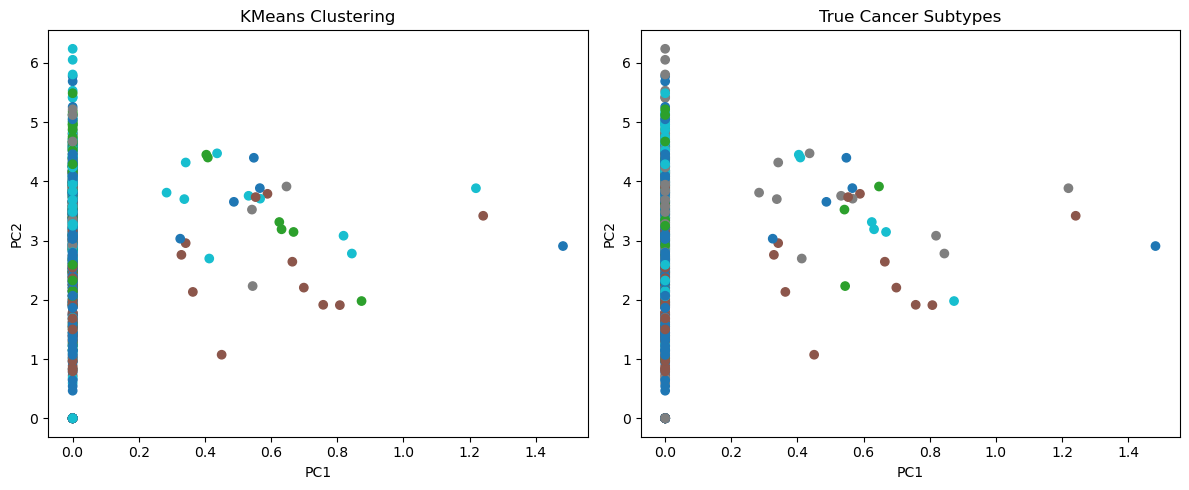

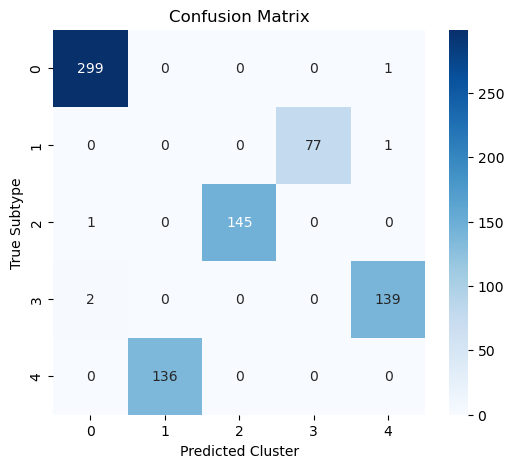

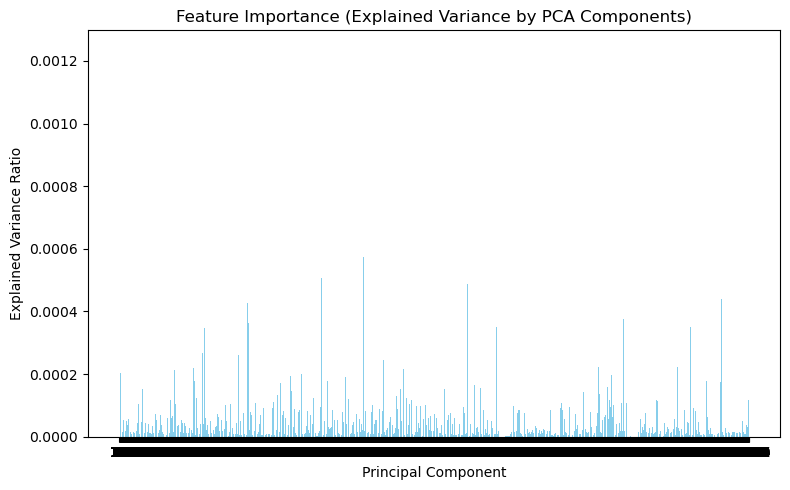

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# === Load your data ===
pca_file = 'data.csv'       # PCA-transformed data (n_samples x n_components)
label_file = 'labels.csv'   # True labels

# Load PCA data
X_pca = pd.read_csv(pca_file, index_col=0)
X_pca = X_pca.values  # Convert to NumPy array

# Load true labels
labels_df = pd.read_csv(label_file)
y_true = labels_df['Class'].values

# === Perform Clustering ===
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

# === Compare with true labels ===
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)

ari = adjusted_rand_score(y_true_encoded, y_pred)
nmi = normalized_mutual_info_score(y_true_encoded, y_pred)
conf_mat = confusion_matrix(y_true_encoded, y_pred)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Info (NMI): {nmi:.3f}")
print("Confusion Matrix:")
print(conf_mat)

# === Visualize Clusters ===
plt.figure(figsize=(12, 5))

# Predicted clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10')
plt.title("KMeans Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

# True labels
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true_encoded, cmap='tab10')
plt.title("True Cancer Subtypes")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.savefig("cluster_scatter_plots_true_cancersubtypes.png", dpi=300, bbox_inches='tight')
plt.show()

# === Confusion Matrix Plot ===
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Subtype")
plt.show()

# === Feature Importance Bar Plot from PCA ===
# Explained variance ratio from PCA indicates importance of each component
pca_df = pd.read_csv(pca_file, index_col=0)
explained_variance = np.var(pca_df.values, axis=0) / np.sum(np.var(pca_df.values, axis=0))

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Feature Importance (Explained Variance by PCA Components)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.tight_layout()
plt.savefig("cluster_scatter_plots_true.png", dpi=300, bbox_inches='tight')
plt.show()

/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


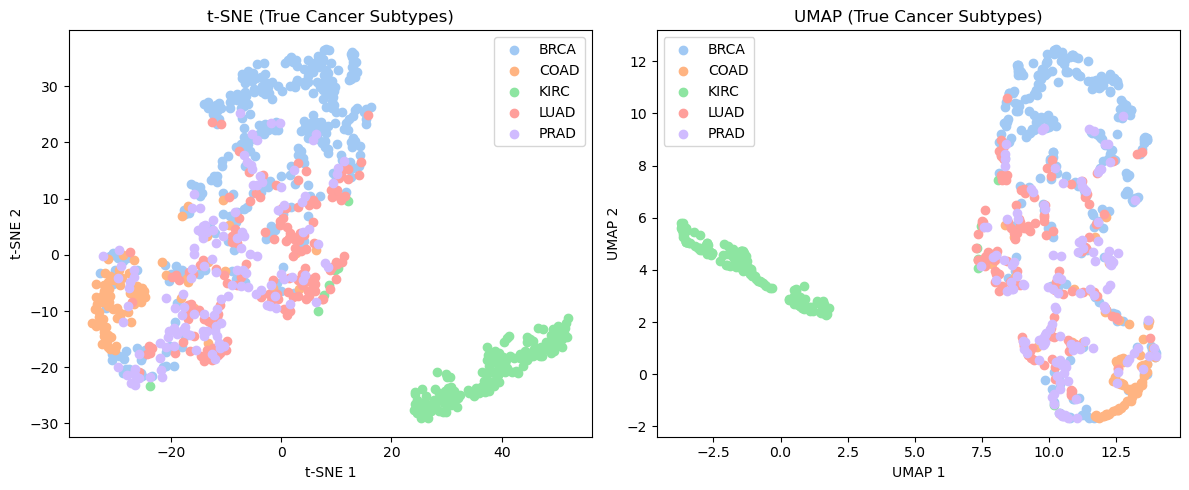

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# === Your data ===
# For example, if you have a DataFrame 'df' with labels in 'Class'
# and PCA-reduced features in 'X_pca' already defined

# Example:
# df = pd.read_csv("your_data.csv")
# X_pca = ... # make sure you already ran your PCA

# Encode labels
y_true = df["Class"].values  # replace "Class" if needed
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_true)

# Color palette
n_classes = len(np.unique(y_true_encoded))
palette = sns.color_palette("pastel", n_classes)

# === t-SNE ===
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# === UMAP ===
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_pca)

# === Plotting side-by-side ===
plt.figure(figsize=(12, 5))

# t-SNE plot
plt.subplot(1, 2, 1)
for class_id in np.unique(y_true_encoded):
    idx = y_true_encoded == class_id
    label = le.inverse_transform([class_id])[0]
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=label, color=palette[class_id])
plt.title("t-SNE (True Cancer Subtypes)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()

# UMAP plot
plt.subplot(1, 2, 2)
for class_id in np.unique(y_true_encoded):
    idx = y_true_encoded == class_id
    label = le.inverse_transform([class_id])[0]
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=label, color=palette[class_id])
plt.title("UMAP (True Cancer Subtypes)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def train_model(model, df, target_column='Class'):
    """
    Trains the model using cross-validation and prints evaluation metrics.

    Parameters:
        model: sklearn estimator instance
        df: pandas DataFrame containing your data
        target_column: name of the column with labels
    """
    # Split data into features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Stratified KFold preserves class balance
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Iterate over each fold of cross-validation
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Training fold {fold+1}...")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Encode any categorical variables
        X_train_encoded = pd.get_dummies(X_train)
        X_test_encoded = pd.get_dummies(X_test)

        # Align train and test columns
        X_train_encoded, X_test_encoded = X_train_encoded.align(
            X_test_encoded,
            join='left',
            axis=1,
            fill_value=0
        )

        # Fit model
        model.fit(X_train_encoded, y_train)

        # Predict
        y_pred = model.predict(X_test_encoded)

        # Calculate metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Calculate averages
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print results
    print("==== Average Evaluation Metrics ====")
    print("Average Accuracy:", round(avg_accuracy, 3))
    print("Average Balanced Accuracy:", round(avg_balanced_accuracy, 3))
    print("Average Precision:", round(avg_precision, 3))
    print("Average Recall:", round(avg_recall, 3))
    print("Average F1 Score:", round(avg_f1, 3))


In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
train_model(model, df)


Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
==== Average Evaluation Metrics ====
Average Accuracy: 0.976
Average Balanced Accuracy: 0.976
Average Precision: 0.977
Average Recall: 0.976
Average F1 Score: 0.976


In [20]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model, df)

Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
==== Average Evaluation Metrics ====
Average Accuracy: 0.997
Average Balanced Accuracy: 0.997
Average Precision: 0.998
Average Recall: 0.997
Average F1 Score: 0.997


In [22]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr')
train_model(model, df)

Training fold 1...


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training fold 2...


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training fold 3...


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training fold 4...


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training fold 5...


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


==== Average Evaluation Metrics ====
Average Accuracy: 0.999
Average Balanced Accuracy: 0.999
Average Precision: 0.999
Average Recall: 0.999
Average F1 Score: 0.999


In [24]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Prepare data
X = df.drop(columns=['Class'])
y = df['Class']

# Encode categorical columns
X_encoded = pd.get_dummies(X)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)


RandomForestClassifier(random_state=42)

Top 25 features saved to 'top_25_important_genes.csv'


/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/1689708438.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


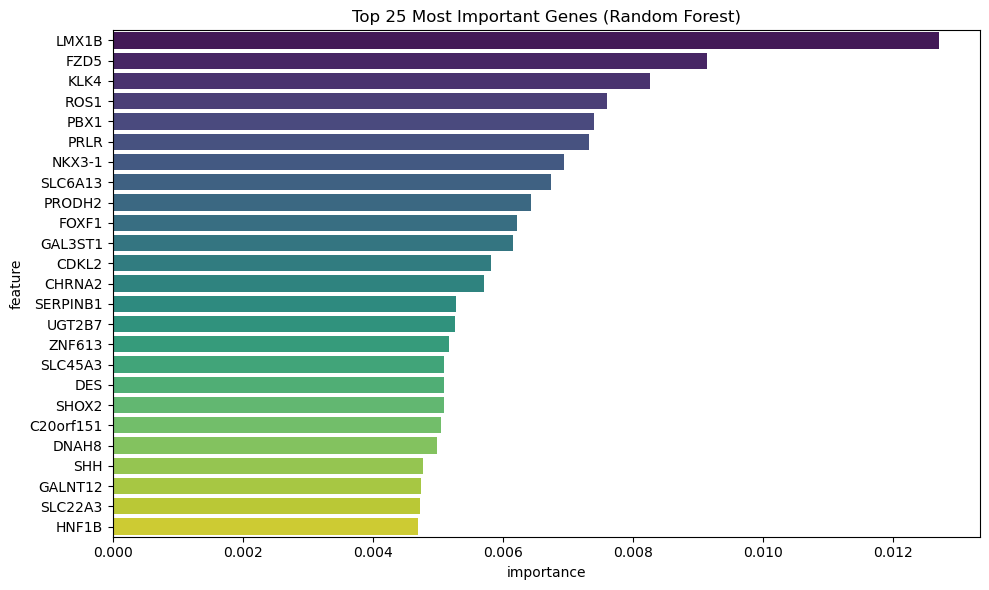

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use encoded columns!
feature_names = X_encoded.columns

# Get feature importances
importances = rf.feature_importances_

# Put into DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort and take top 25
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(25)

# Save top features to CSV
top_features.to_csv("top_25_important_genes.csv", index=False)
print("Top 25 features saved to 'top_25_important_genes.csv'")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 25 Most Important Genes (Random Forest)')
plt.tight_layout()
plt.show()


  Cancer Class  Number of Top Genes
0         PRAD                    8
1         KIRC                    6
2         BRCA                    5
3         COAD                    4
4         LUAD                    2


/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_3419/2052947618.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_counts, x='Cancer Class', y='Number of Top Genes', palette='Set2')


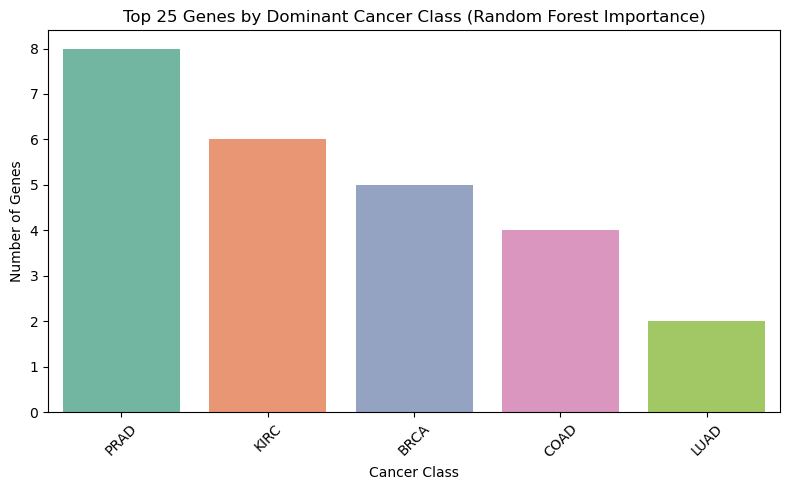

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importances from trained Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# 2. Create DataFrame of importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# 3. Sort and select top 25 genes
top_features_df = feature_importance_df.sort_values(by='importance', ascending=False).head(25)
top_genes = top_features_df['feature'].tolist()

# 4. Subset full data to top genes + cancer class
df_subset = df[top_genes + ['Class']]

# 5. Compute average expression of each gene across cancer classes
avg_expr_by_class = df_subset.groupby('Class').mean().T

# 6. Identify dominant cancer class for each top gene
avg_expr_by_class['Dominant_Class'] = avg_expr_by_class.idxmax(axis=1)

# 7. Count how many top genes are dominated by each class
summary_counts = avg_expr_by_class['Dominant_Class'].value_counts().reset_index()
summary_counts.columns = ['Cancer Class', 'Number of Top Genes']

# 8. Show the summary table
print(summary_counts)

# 9. Optional: Bar plot of gene counts by dominant cancer class
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_counts, x='Cancer Class', y='Number of Top Genes', palette='Set2')
plt.title('Top 25 Genes by Dominant Cancer Class (Random Forest Importance)')
plt.ylabel('Number of Genes')
plt.xlabel('Cancer Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Running: F-test


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    5    23  3527  4370  4375  4376  4808  4809  4814  4816  4817  4831
  5288  7661  7662  7663  7664  7665  8121  9304  9306  9309  9314  9316
  9320  9452  9744 10121 11958 12559 13991 14158 14159 14160 14161 15138
 15140 15141 15446 16566 16567 16568 16569 16571 16575 16576 16578 16579
 16604 16634 16637 16677 16697 16698 16699 16700 16701 16702 16704 16705
 16706 16707 16708 16709 16710 16711 16712 16713 16714 16715 16716 16717
 16718 16719 16720 16721 16722 16723 16724 16725 16726 16727 16728 16729
 16730 16731 16732 16733 16734 16735 16736 16737 16738 16739 16740 16741
 16742 16743 16744 16745 16746 16748 16749 16750 16751 16752 16753 16754
 16756 16757 16758 16759 16760 16761 16762 16763 16764 16765 16766 16767
 16768 16769 16770 16771 16772 16774 16775 16776 16777 16778 16779 16780
 16781 16782 16783 16785 16787 16788 16789 16790 16791 


Running: Mutual Information


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3


Running: RFE

Running: L1 (Lasso)

Performance Summary:
             Accuracy  Precision  Recall  F1 Score  Runtime (s)
F-test          0.999      0.999   0.999     0.999        4.380
Mutual Info     1.000      1.000   1.000     1.000      162.641
RFE             1.000      1.000   1.000     1.000       53.098
L1 (Lasso)      0.997      0.996   0.999     0.997       10.490


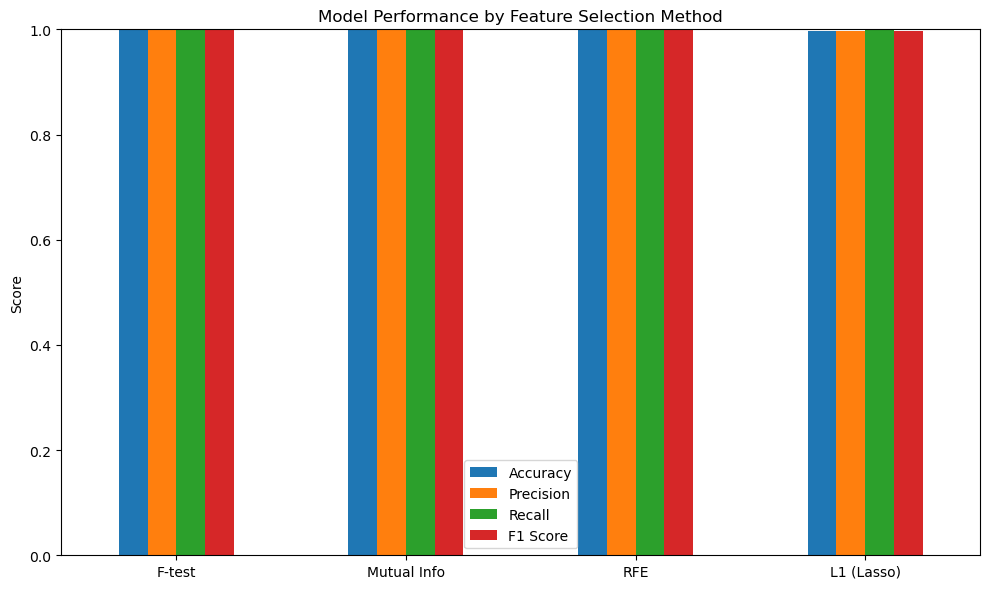

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# === Input your full dataset ===
X = df.drop("Class", axis=1)
y = df["Class"]

# Encode any categorical columns
X_encoded = pd.get_dummies(X)

# === Cross-validation and scoring setup ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# === Comparison dictionary ===
results = {}
timings = {}

# === Method 1: F-test ===
print("\nRunning: F-test")
start = time.time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=500)),
    ('model', LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'))
])
results['F-test'] = cross_validate(pipeline, X_encoded, y, cv=cv, scoring=scoring)
timings['F-test'] = time.time() - start

# === Method 2: Mutual Information ===
print("\nRunning: Mutual Information")
start = time.time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=mutual_info_classif, k=500)),
    ('model', LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'))
])
results['Mutual Info'] = cross_validate(pipeline, X_encoded, y, cv=cv, scoring=scoring)
timings['Mutual Info'] = time.time() - start

# === Method 3: RFE (LinearSVC) ===
print("\nRunning: RFE")
start = time.time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', RFE(
        estimator=LinearSVC(penalty="l2", dual=False, max_iter=10000, random_state=42),
        n_features_to_select=500,
        step=0.5)),
    ('model', LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'))
])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results['RFE'] = cross_validate(pipeline, X_encoded, y, cv=cv, scoring=scoring)
timings['RFE'] = time.time() - start

# === Method 4: L1 (Lasso) ===
print("\nRunning: L1 (Lasso)")
start = time.time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectFromModel(
        LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, C=1.0))),
    ('model', LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'))
])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results['L1 (Lasso)'] = cross_validate(pipeline, X_encoded, y, cv=cv, scoring=scoring)
timings['L1 (Lasso)'] = time.time() - start

# === Format and print results ===
summary = pd.DataFrame({
    method: {
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision_macro']),
        'Recall': np.mean(scores['test_recall_macro']),
        'F1 Score': np.mean(scores['test_f1_macro']),
        'Runtime (s)': timings[method]
    }
    for method, scores in results.items()
}).T.round(3)

# === Save to CSV ===
summary.to_csv("feature_selection_comparison.csv")
print("\nPerformance Summary:")
print(summary)

# === Plot results ===
summary.drop(columns="Runtime (s)").plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance by Feature Selection Method")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.savefig("feature_selection_comparison_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
import optuna

def optimize_model_on_fold(algo_name, algo_class, X_train, y_train):
    def objective(trial):
        # Define hyperparameter search space based on the algorithm
        if algo_name == "decision_tree":
            max_depth = trial.suggest_int("max_depth", 1, 32)
            min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
            model = algo_class(max_depth=max_depth, min_samples_split=min_samples_split)
        elif algo_name == "random_forest":
            n_estimators = trial.suggest_int("n_estimators", 10, 200)
            max_depth = trial.suggest_int("max_depth", 1, 32)
            model = algo_class(n_estimators=n_estimators, max_depth=max_depth)
        elif algo_name == "logistic_regression":
            C = trial.suggest_loguniform("C", 1e-4, 1e2)
            model = algo_class(C=C, max_iter=1000)
        elif algo_name == "svm":
            C = trial.suggest_loguniform("C", 1e-4, 1e2)
            kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])
            model = algo_class(C=C, kernel=kernel, probability=True)
        elif algo_name == "xgboost":
            n_estimators = trial.suggest_int("n_estimators", 10, 200)
            max_depth = trial.suggest_int("max_depth", 1, 32)
            learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1.0)
            model = algo_class(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, use_label_encoder=False, eval_metric='mlogloss')
        else:
            raise ValueError(f"Unsupported algorithm: {algo_name}")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        return f1_score(y_train, y_pred, average='weighted')

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=N_TRIALS)
    return study.best_params


 Evaluating algorithm: decision_tree

 Fold 1/3 for decision_tree

 Fold 2/3 for decision_tree

 Fold 3/3 for decision_tree

 Evaluating algorithm: random_forest

 Fold 1/3 for random_forest

 Fold 2/3 for random_forest

 Fold 3/3 for random_forest

 Evaluating algorithm: logistic_regression

 Fold 1/3 for logistic_regression

 Fold 2/3 for logistic_regression

 Fold 3/3 for logistic_regression

 Evaluating algorithm: svm

 Fold 1/3 for svm

 Fold 2/3 for svm

 Fold 3/3 for svm

 Evaluating algorithm: xgboost

 Fold 1/3 for xgboost

 Fold 2/3 for xgboost

 Fold 3/3 for xgboost


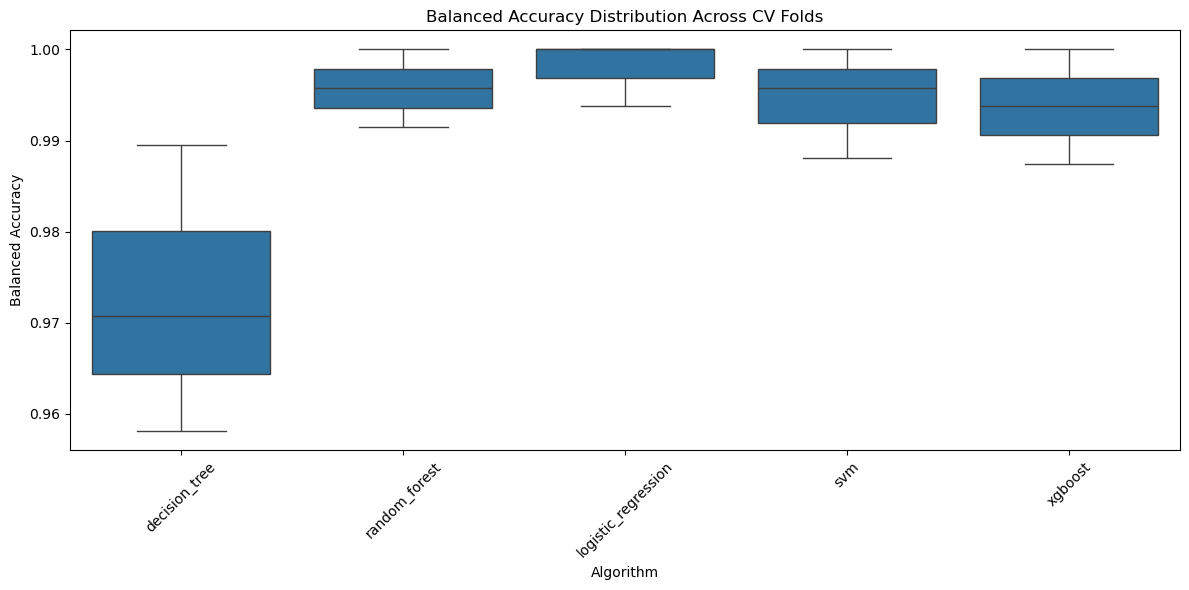

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Prepare data
# Prepare data
X = df.drop(columns=['Class'])
y = df['Class']

# Encode categorical features
X = pd.get_dummies(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y_encoded, name="Class")

# Encode text labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = pd.Series(y_encoded, name="Class")

# Parameters
K_FOLDS = 3
ALGORITHMS = {
    "decision_tree": DecisionTreeClassifier,
    "random_forest": RandomForestClassifier,
    "logistic_regression": LogisticRegression,
    "svm": SVC,
    "xgboost": XGBClassifier
}

# Storage
study_results_header = [
    'Algorithm','CV Partition', 'Accuracy', 'Balanced Accuracy',
    'Precision', 'Recall', 'F1-Score','ROC-AUC','Best Hyperparameters'
]
study_results = []
os.makedirs('output', exist_ok=True)

# Loop through algorithms
for algo_name, algo_class in ALGORITHMS.items():
    print(f"\n Evaluating algorithm: {algo_name}")

    skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"\n Fold {fold + 1}/{K_FOLDS} for {algo_name}")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # No optimization for now - default hyperparameters
        best_params = {}

        # Train
        model = algo_class(**best_params)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Metrics
        model_accuracy = accuracy_score(y_test, y_pred)
        model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        model_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        model_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        model_f1_score = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # AUC handling
        try:
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)
            else:
                y_proba = model.decision_function(X_test)
                if y_proba.ndim == 1:
                    # Binary case: reshape
                    y_proba = np.vstack([1 - y_proba, y_proba]).T
            model_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        except Exception:
            model_auc = np.nan

        model_result_list = [
            algo_name,
            str(fold + 1),
            model_accuracy,
            model_balanced_accuracy,
            model_precision,
            model_recall,
            model_f1_score,
            model_auc,
            best_params
        ]
        study_results.append(model_result_list)

# Convert results to DataFrame
df_results = pd.DataFrame(study_results, columns=study_results_header)
df_results.to_csv('output/study_results.csv', index=False)

# Boxplot of Balanced Accuracy
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_results, x='Algorithm', y='Balanced Accuracy')
plt.title('Balanced Accuracy Distribution Across CV Folds')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output/Balanced_Accuracy_score_boxplot.png')
plt.show()


In [35]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 2) SEPARATE FEATURES (X) AND TARGET (y)
X = df.drop(columns=["Class"]).copy()  # shape = (n_samples, n_genes)

# Encode categorical columns if needed
X = pd.get_dummies(X)

gene_names = X.columns.tolist()         # list of gene symbols
y = df["Class"].copy()

# 3) ENCODE CANCER CLASS LABELS AS INTEGERS
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# 4) SPLIT INTO TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, stratify=y_encoded, random_state=42
)

# 5) STANDARDIZE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 6) FEATURE SELECTION WITH RFE
base_estimator = LinearSVC(
    penalty="l2",
    loss="squared_hinge",
    dual=False,
    C=1.0,
    random_state=42,
    max_iter=5000
)

rfe = RFE(estimator=base_estimator, n_features_to_select=1000, step=0.05)
rfe.fit(X_train_scaled, y_train)

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

selected_gene_indices = rfe.get_support(indices=True)
selected_gene_names = [gene_names[i] for i in selected_gene_indices]

# Train new model
svm_clf = LinearSVC(
    penalty="l2",
    loss="squared_hinge",
    dual=False,
    C=1.0,
    random_state=42,
    max_iter=5000
)
svm_clf.fit(X_train_selected, y_train)

# 7) COEFFICIENT MATRIX
coef_matrix = svm_clf.coef_

# 8) IDENTIFY TOP K GENES
top_k = 10
top_genes_per_class = {}

for class_idx, class_label in enumerate(class_names):
    coefs_for_class = coef_matrix[class_idx, :]
    sorted_indices = np.argsort(np.abs(coefs_for_class))[::-1]
    top_indices = sorted_indices[:top_k]
    top_genes = [selected_gene_names[i] for i in top_indices]
    top_coeffs = coefs_for_class[top_indices]
    top_genes_per_class[class_label] = list(zip(top_genes, top_coeffs))

# 9) DISPLAY
for class_label, gene_coeff_list in top_genes_per_class.items():
    print(f"\nTop {top_k} genes associated with class '{class_label}':")
    for gene, coef in gene_coeff_list:
        direction = "↑" if coef > 0 else "↓"
        print(f"  {gene:15s}   coef = {coef: .4f}   ({direction})")

# 10) DataFrame
rows = []
for class_label, gene_coeff_list in top_genes_per_class.items():
    for rank, (gene, coef) in enumerate(gene_coeff_list, start=1):
        rows.append({
            "Class": class_label,
            "Rank": rank,
            "Gene": gene,
            "Coefficient": coef
        })

df_top_genes = pd.DataFrame(rows)
print("\nDataFrame of top genes by class:")
print(df_top_genes)


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/


Top 10 genes associated with class 'BRCA':
  OR10R2            coef =  0.0146   (↑)
  TCF21             coef = -0.0137   (↓)
  TGM2              coef = -0.0132   (↓)
  FLJ45983          coef =  0.0130   (↑)
  TFAP2B            coef =  0.0128   (↑)
  PDE4C             coef = -0.0127   (↓)
  AZGP1             coef =  0.0127   (↑)
  Predicted_Class_BRCA   coef =  0.0126   (↑)
  GFRA1             coef =  0.0125   (↑)
  TMEM63C           coef =  0.0125   (↑)

Top 10 genes associated with class 'COAD':
  Predicted_Class_COAD   coef =  0.0282   (↑)
  MAB21L2           coef =  0.0258   (↑)
  LOC646627         coef =  0.0245   (↑)
  RETNLB            coef =  0.0245   (↑)
  FLJ32063          coef =  0.0243   (↑)
  NCRNA00114        coef =  0.0236   (↑)
  CDX1              coef =  0.0234   (↑)
  FABP2             coef =  0.0233   (↑)
  NEK3              coef =  0.0232   (↑)
  LY6G6E            coef =  0.0224   (↑)

Top 10 genes associated with class 'KIRC':
  Predicted_Class_KIRC   coef =  0.015

/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/289592722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/289592722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/289592722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/s6/bv2v8k4j155_lhlfzkk0j_3w0000gn/T/ipykernel_7893/289592722.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

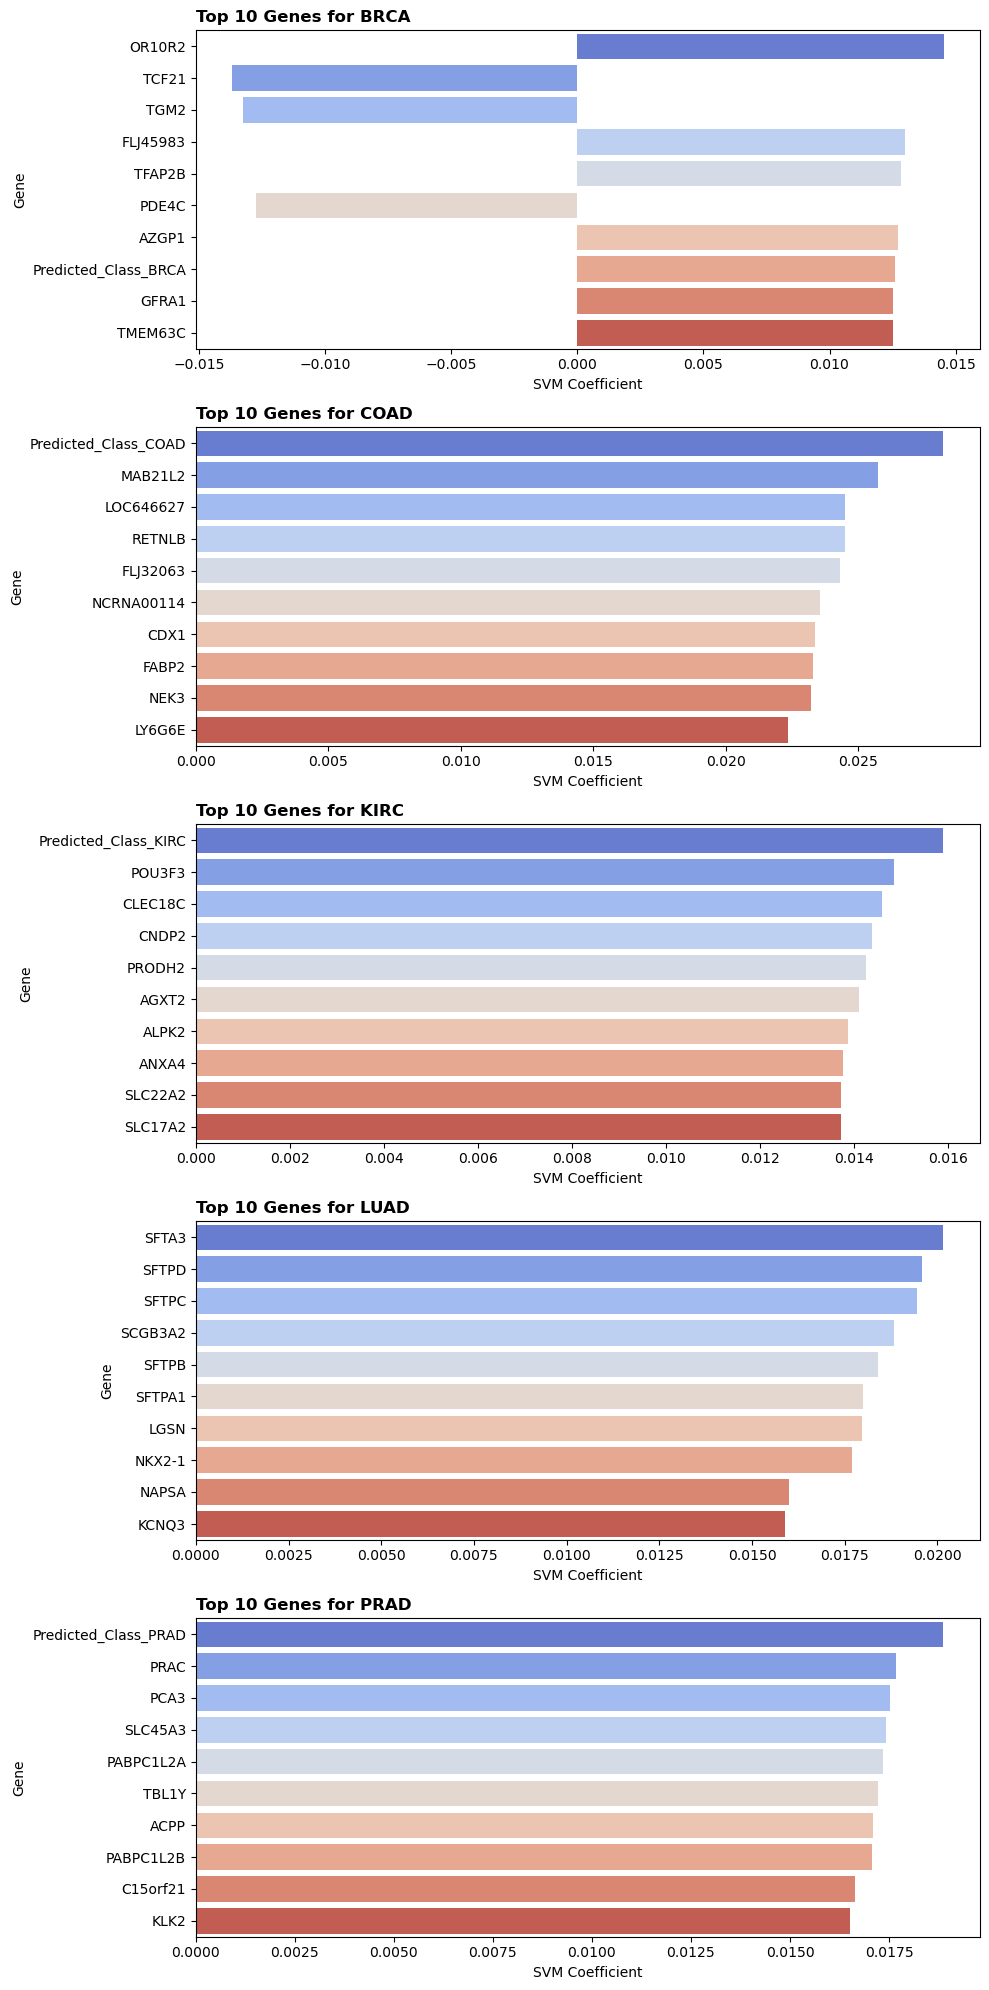

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of unique classes
unique_classes = df_top_genes["Class"].unique()
n_classes = len(unique_classes)

# Create subplots — one for each cancer class
fig, axes = plt.subplots(n_classes, 1, figsize=(10, n_classes * 4), sharex=False)

# If only one class, axes isn't a list, so force it to a list
if n_classes == 1:
    axes = [axes]

# Plot top genes per class
for ax, cls in zip(axes, unique_classes):
    subdf = df_top_genes[df_top_genes["Class"] == cls]
    
    sns.barplot(
        data=subdf,
        x="Coefficient",
        y="Gene",
        ax=ax,
        palette="coolwarm"
    )
    
    ax.set_title(f"Top {top_k} Genes for {cls}", loc="left", fontsize=12, fontweight="bold")
    ax.set_xlabel("SVM Coefficient")
    ax.set_ylabel("Gene")

plt.tight_layout()
plt.savefig("Top_Genes_by_Cancer_Class.png", dpi=300, bbox_inches="tight")
plt.show()


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


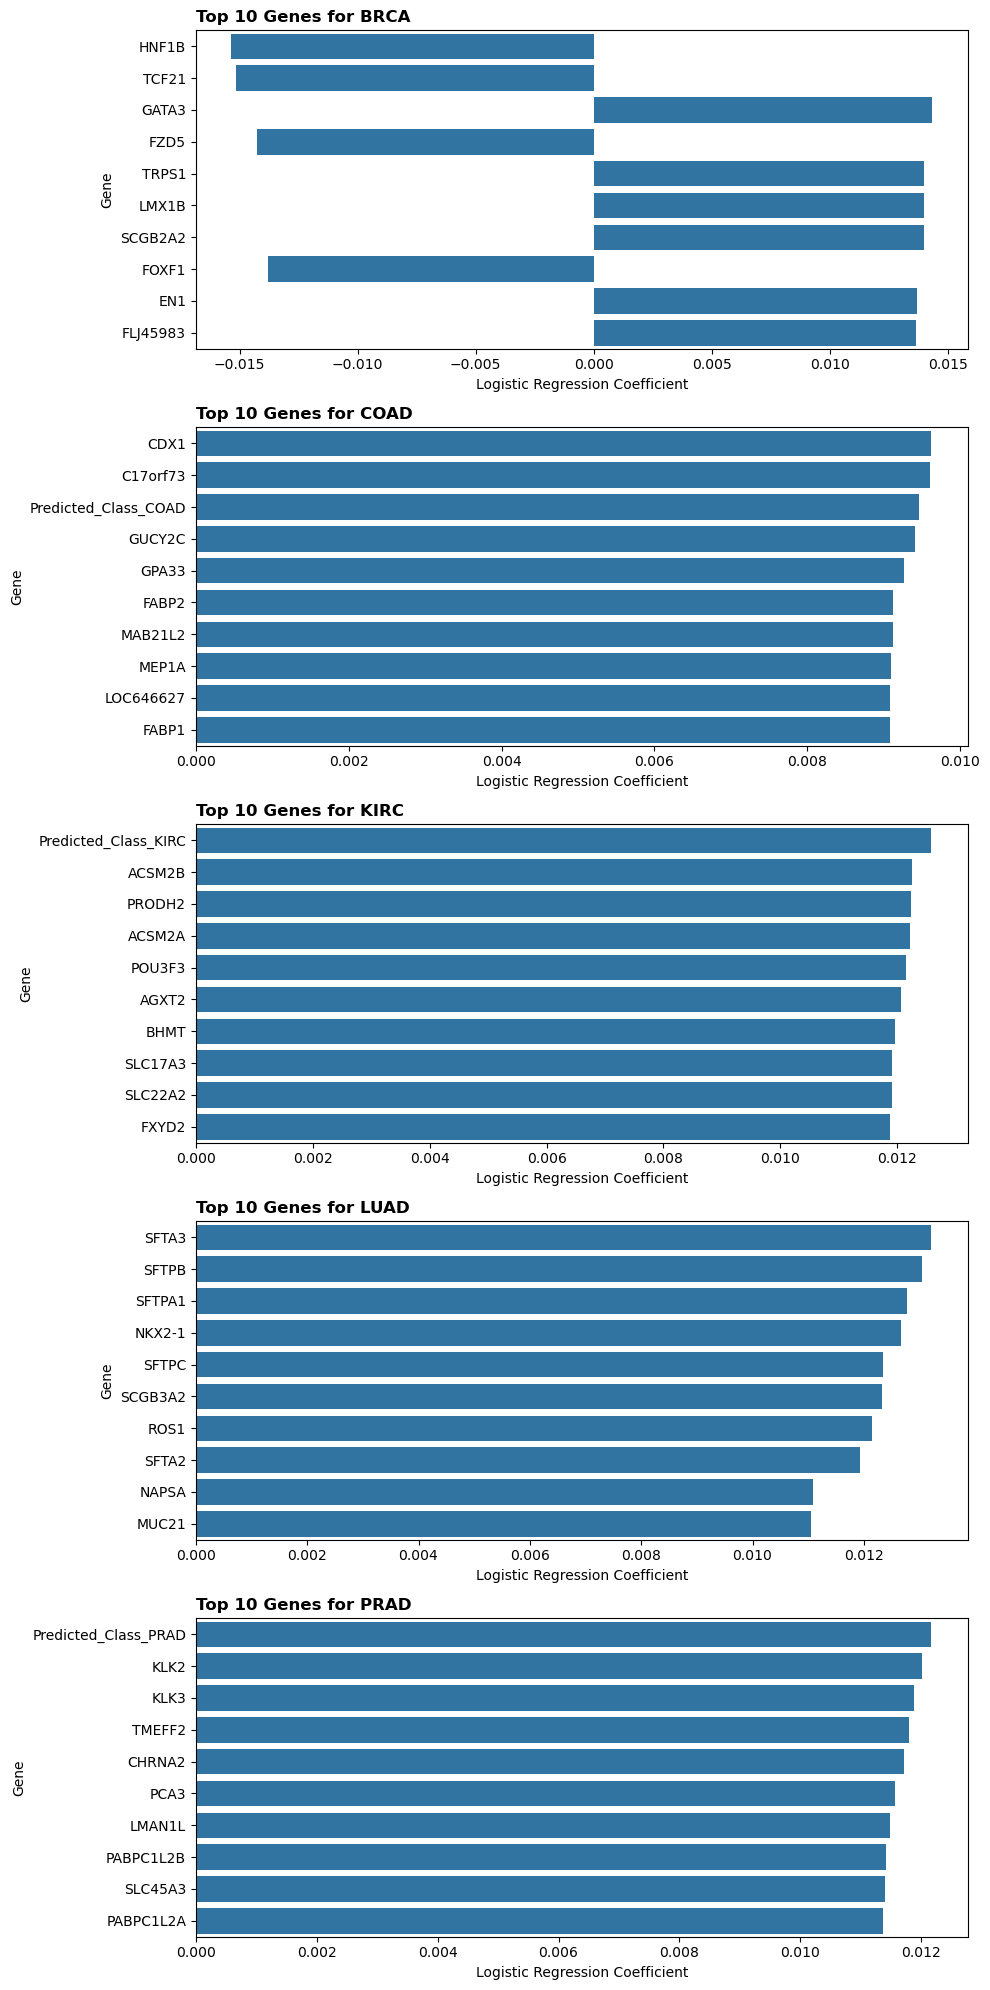

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ----- 1. Prepare data -----
X = df.drop(columns=["Class"])
y = df["Class"]

# Encode categorical columns
X = pd.get_dummies(X)

# Encode class labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Train/test split (optional)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train logistic regression
lr = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=10000, random_state=42
)
lr.fit(X_train_scaled, y_train)

# ----- 2. Get top genes per class -----
coef_matrix = lr.coef_  # shape = (n_classes, n_features)
gene_names = X.columns.tolist()
top_k = 10

rows = []
for class_idx, class_label in enumerate(class_names):
    coefs = coef_matrix[class_idx]
    top_idx = np.argsort(np.abs(coefs))[::-1][:top_k]
    for rank, idx in enumerate(top_idx, 1):
        rows.append({
            "Class": class_label,
            "Gene": gene_names[idx],
            "Coefficient": coefs[idx],
            "Rank": rank
        })

df_top_genes = pd.DataFrame(rows)

# ----- 3. Plot per class -----
unique_classes = df_top_genes["Class"].unique()
n_classes = len(unique_classes)

fig, axes = plt.subplots(n_classes, 1, figsize=(10, n_classes * 4), sharex=False)

# If only one class, force axes to a list
if n_classes == 1:
    axes = [axes]

for ax, cls in zip(axes, unique_classes):
    subdf = df_top_genes[df_top_genes["Class"] == cls]
    sns.barplot(
        data=subdf,
        x="Coefficient",
        y="Gene",
        ax=ax,
        color="#1f77b4"  # solid blue
    )
    ax.set_title(f"Top {top_k} Genes for {cls}", loc="left", fontsize=12, fontweight="bold")
    ax.set_xlabel("Logistic Regression Coefficient")
    ax.set_ylabel("Gene")

plt.tight_layout()
plt.savefig("Top_Genes_by_Class_LogReg.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

# Make sure X_train, X_test are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Step 1: Train a Random Forest to select top features (use full feature set)
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_train, y_train)

# Step 2: Get top 100 features by importance
importances = pd.Series(rf_temp.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(100).index

# Step 3: Subset train and test to those features
X_train_small = X_train[top_features]
X_test_small = X_test[top_features]

# ✅ Step 4: Train a new model on the reduced feature set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_small, y_train)

# Step 5: Permutation importance (this will now work)
perm = permutation_importance(
    rf,
    X_test_small,
    y_test,
    n_repeats=5,
    scoring="accuracy",
    random_state=42
)


# Step 6: Output
perm_df = pd.DataFrame({
    "Feature": X_test_small.columns,
    "Importance": perm.importances_mean,
    "Std": perm.importances_std
}).sort_values("Importance", ascending=False)

print(perm_df.head(10).to_string(index=False))

y_pred = rf.predict(X_test_small)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Feature  Importance      Std
  HNF1B    0.006211 0.003928
  LMX1B    0.000000 0.000000
MAB21L1    0.000000 0.000000
 TFAP2C    0.000000 0.000000
SLC17A2    0.000000 0.000000
  CTSL3    0.000000 0.000000
    DES    0.000000 0.000000
   PKP3    0.000000 0.000000
 TFAP2B    0.000000 0.000000
 TMEM79    0.000000 0.000000
Accuracy: 0.9937888198757764
Balanced Accuracy: 0.9875
Precision: 0.9940029985007497
Recall: 0.9937888198757764
F1 Score: 0.9937431235873696


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/l


Logistic Regression Evaluation:
Train Accuracy:      1.0
Test Accuracy:       0.9937888198757764
Balanced Accuracy:   0.9928571428571429
Precision (weighted): 0.9938906425007638
Recall (weighted):    0.9937888198757764
F1 Score (weighted):  0.993758020635491

Top 20 features by absolute coefficient:
SFTA3         0.017723
HAND2         0.017562
HOXA9         0.017336
NKX2-1        0.016785
FOXA2         0.016628
SFTPA2        0.016620
SFTPB         0.016478
ST6GALNAC1    0.016169
HKDC1         0.016157
NBLA00301     0.016073
COL4A3        0.016011
C20orf56      0.015899
C6orf223      0.015860
ACADL         0.015830
CRYL1         0.015780
SFTPA1        0.015741
SOX21         0.015717
VAV3          0.015706
SCN9A         0.015678
C19orf77      0.015643
dtype: float64


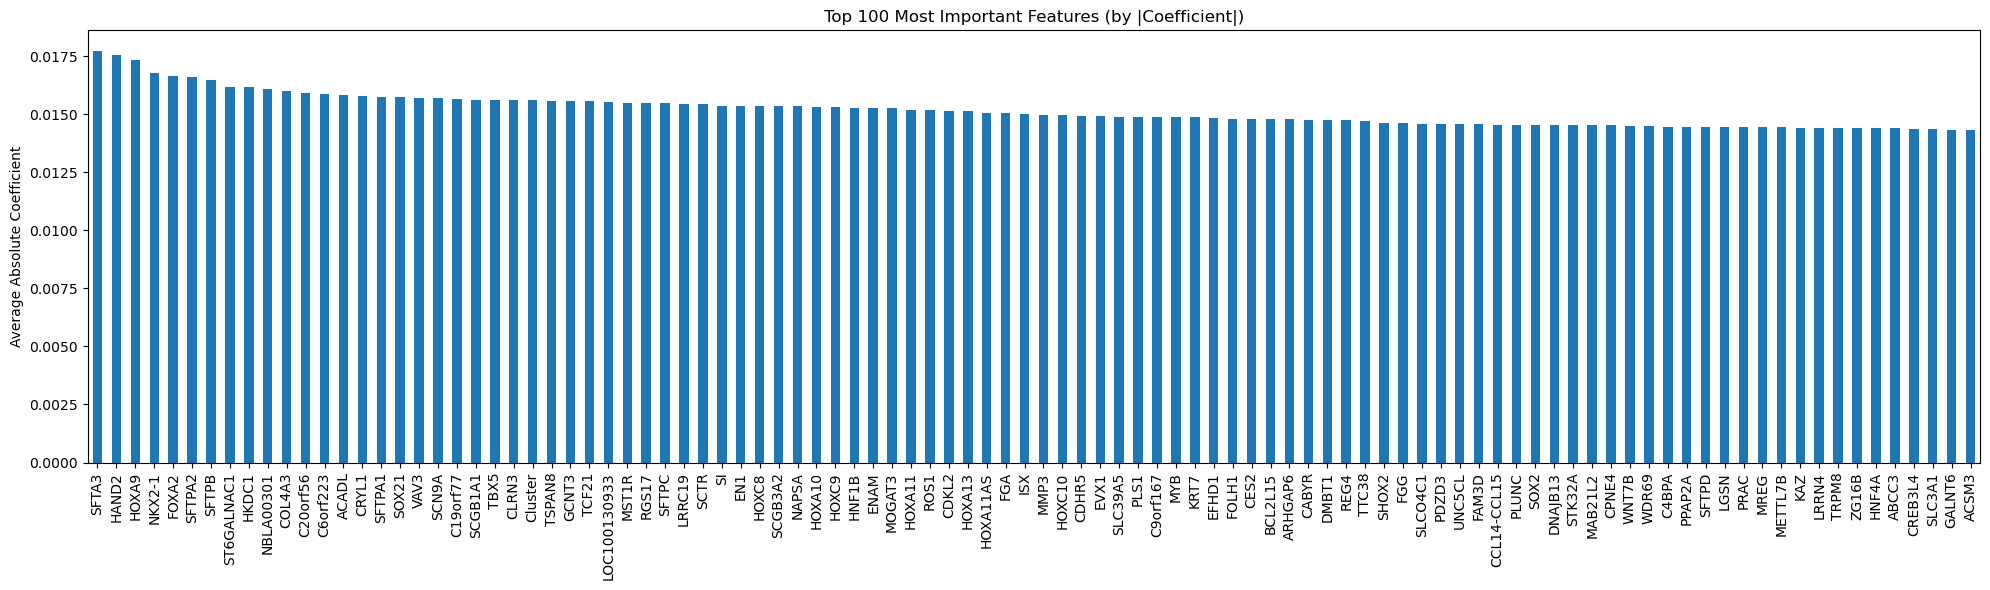

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# ----- 1. Prepare data -----
X = df.drop(columns=['Class'])
y = df['Class']

# Encode any categorical columns in X
X = pd.get_dummies(X)

# Encode target labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- 2. Feature selection with RFE -----
lr_base = LogisticRegression(
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=10000,
    random_state=42
)

rfe = RFE(estimator=lr_base, n_features_to_select=1000, step=0.1)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Get names of selected features
selected_features = X.columns[rfe.get_support()]

# ----- 3. Train final logistic regression model -----
lr = LogisticRegression(
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=10000,
    random_state=42
)
lr.fit(X_train_rfe, y_train)
y_pred = lr.predict(X_test_rfe)

# ----- 4. Evaluate model -----
print("\nLogistic Regression Evaluation:")
print("Train Accuracy:     ", lr.score(X_train_rfe, y_train))
print("Test Accuracy:      ", lr.score(X_test_rfe, y_test))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred, average='weighted'))

# ----- 5. Plot top 100 features by absolute coefficient -----
coefs = lr.coef_

# Handle multiclass: average abs(coef) across classes
if coefs.shape[0] > 1:
    abs_coefs = pd.DataFrame(np.abs(coefs), columns=selected_features).mean(axis=0)
else:
    abs_coefs = pd.Series(np.abs(coefs[0]), index=selected_features)

abs_coefs = abs_coefs.sort_values(ascending=False)

print("\nTop 20 features by absolute coefficient:")
print(abs_coefs.head(20))

# Plot
plt.figure(figsize=(20, 6))
abs_coefs.head(100).plot.bar(color="#1f77b4")
plt.title("Top 100 Most Important Features (by |Coefficient|)")
plt.ylabel("Average Absolute Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# ----- 1. Prepare data -----
X = df.drop(columns=['Class'])
y = df['Class']

# Encode target labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# ----- 2. Feature selection with RFE (XGBoost) -----
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_enc)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=50,         # Use smaller value for speed in RFE
    learning_rate=0.1,
    max_depth=3,
    verbosity=0,
    random_state=42
)

rfe = RFE(estimator=xgb_base, n_features_to_select=1000, step=0.1, verbose=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected feature names
selected_features = X.columns[rfe.get_support()]

# ----- 3. Final XGBoost model on selected features -----
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_enc)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    verbosity=0,
    random_state=42
)

xgb.fit(X_train_rfe, y_train)
y_pred = xgb.predict(X_test_rfe)

# ----- 4. Evaluate model -----
print("\nXGBoost (RFE-Selected 1000 Genes) Evaluation:")
print("Train Accuracy:     ", xgb.score(X_train_rfe, y_train))
print("Test Accuracy:      ", xgb.score(X_test_rfe, y_test))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred, average='weighted'))

# ----- 5. Plot Top 100 Features by Gain -----
booster = xgb.get_booster()
importance_df = pd.DataFrame.from_dict(
    booster.get_score(importance_type='gain'),
    orient='index',
    columns=['Gain']
)

# Map back to selected gene names
feature_map = {f"f{idx}": name for idx, name in enumerate(selected_features)}
importance_df.index = importance_df.index.map(feature_map)

importance_df = importance_df.sort_values(by='Gain', ascending=False)

print("\nTop 20 Features by Gain:")
print(importance_df.head(20))

# Plot
plt.figure(figsize=(20, 6))
importance_df.head(100).plot.bar()
plt.title("Top 100 Features by Gain (XGBoost after RFE)")
plt.ylabel("Gain")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'LUAD'

/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Linear SVM Evaluation:
Train Accuracy:      1.0
Test Accuracy:       1.0
Balanced Accuracy:   1.0
Precision (weighted): 1.0
Recall (weighted):    1.0
F1 Score (weighted):  1.0

Top 20 features by absolute coefficient:
TBX5       0.008979
HAND2      0.008724
RNF144B    0.008403
AZGP1      0.008383
GIP        0.008380
TRPV6      0.008327
TCF21      0.008294
HPN        0.008271
HNF1B      0.008149
CDX1       0.008079
MAB21L2    0.008055
CREB3L4    0.007929
SOX21      0.007882
COL4A3     0.007859
SFTA3      0.007851
KRT7       0.007840
AXIN2      0.007761
SLC4A4     0.007754
KBTBD12    0.007730
SHOX2      0.007708
dtype: float64


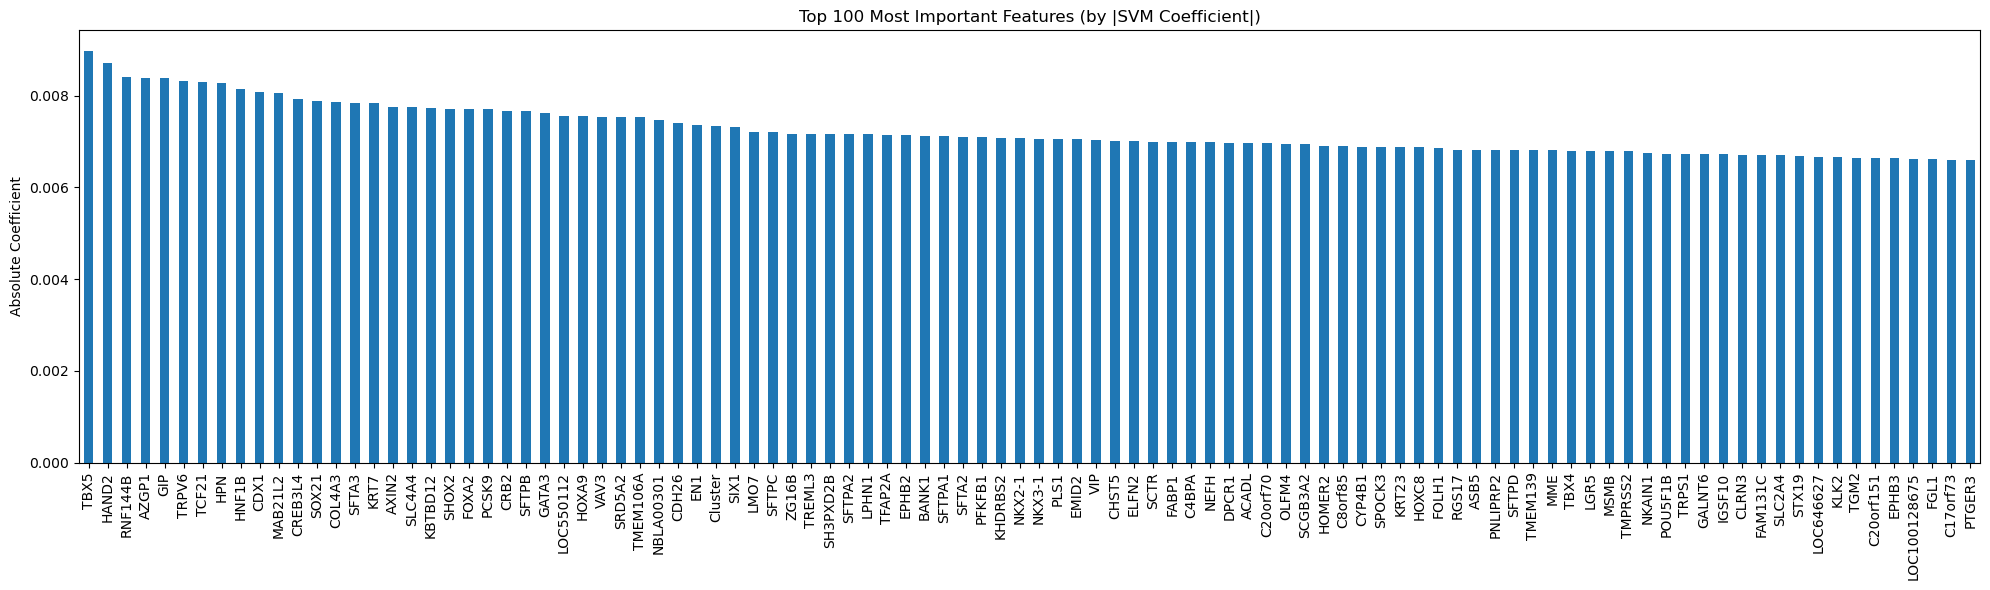

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

# ----- 1. Prepare data -----
X = df.drop(columns=['Class'])
y = df['Class']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- 2. Feature selection with RFE -----
svc_base = LinearSVC(
    penalty="l2",
    dual=False,            # use dual=False if n_samples > n_features
    max_iter=10000,
    random_state=42
)

rfe = RFE(estimator=svc_base, n_features_to_select=1000, step=0.1)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[rfe.get_support()]
X_train_rfe_df = pd.DataFrame(X_train_rfe, columns=selected_features)
X_test_rfe_df = pd.DataFrame(X_test_rfe, columns=selected_features)

# ----- 3. Train final Linear SVM -----
svc_final = LinearSVC(
    penalty="l2",
    dual=False,
    max_iter=10000,
    random_state=42
)
svc_final.fit(X_train_rfe_df, y_train)
y_pred = svc_final.predict(X_test_rfe_df)

# ----- 4. Evaluation -----
print("\nLinear SVM Evaluation:")
print("Train Accuracy:     ", svc_final.score(X_train_rfe_df, y_train))
print("Test Accuracy:      ", svc_final.score(X_test_rfe_df, y_test))
print("Balanced Accuracy:  ", balanced_accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (weighted): ", f1_score(y_test, y_pred, average='weighted'))

# ----- 5. Plot top 100 features by absolute coefficient -----
coefs = svc_final.coef_

# Handle multiclass: average abs(coef) across classes
if coefs.shape[0] > 1:
    abs_coefs = pd.DataFrame(np.abs(coefs), columns=selected_features).mean(axis=0)
else:
    abs_coefs = pd.Series(np.abs(coefs[0]), index=selected_features)

abs_coefs = abs_coefs.sort_values(ascending=False)

print("\nTop 20 features by absolute coefficient:")
print(abs_coefs.head(20))

# Plot
plt.figure(figsize=(20, 6))
abs_coefs.head(100).plot.bar()
plt.title("Top 100 Most Important Features (by |SVM Coefficient|)")
plt.ylabel("Absolute Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["lin

<Figure size 1000x600 with 0 Axes>

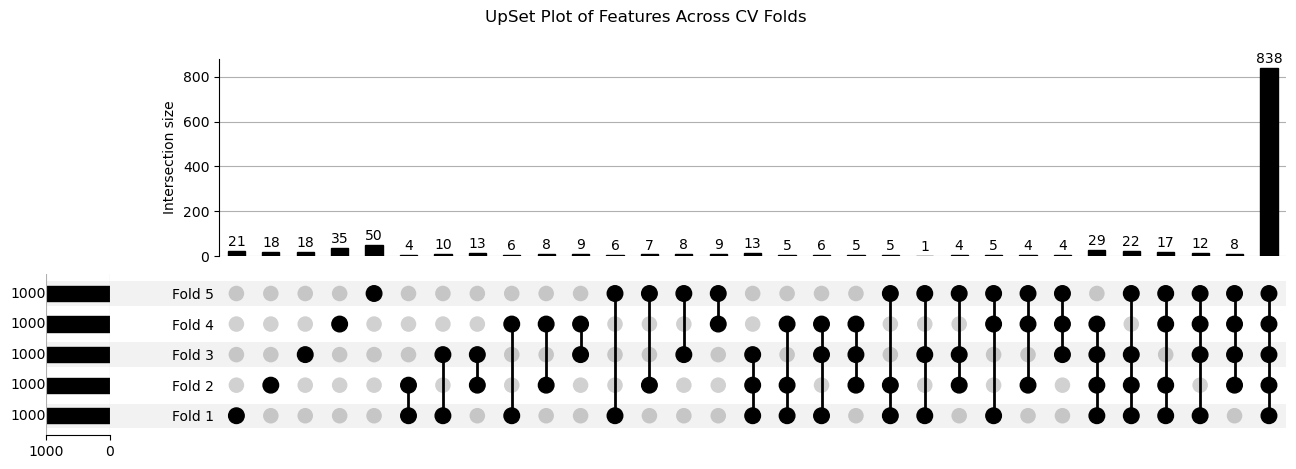

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from upsetplot import UpSet, from_memberships

# Assume selected_features_all_folds = [set(...), set(...), ..., set(...)] from your CV loop

# Convert to string names if not already
feature_sets = [set(map(str, s)) for s in selected_features_all_folds]

# Build membership map
membership_data = {}
for i, feature_set in enumerate(feature_sets):
    for feature in feature_set:
        membership_data.setdefault(feature, []).append(f"Fold {i+1}")

# Create UpSet input
memberships = from_memberships(membership_data.values())
plt.figure(figsize=(10, 6))
UpSet(memberships, subset_size='count', show_counts=True).plot()
plt.suptitle("UpSet Plot of Features Across CV Folds")
plt.tight_layout()
plt.show()



Top 100 features overlap: 15 features
Overlapping features:
['CDX1', 'Cluster', 'FAM131C', 'IGSF10', 'KRT23', 'LOC646627', 'MSMB', 'RNF144B', 'SFTA2', 'SFTA3', 'SFTPA1', 'SFTPA2', 'SIX1', 'SPOCK3', 'SRD5A2']

Ranked Overlapping Features:
      Feature  LogReg Rank  SVM Rank
10     SFTPA1            5        47
11     SFTPA2            7        15
1     Cluster            8        69
8       SFTA2           18        34
0        CDX1           31        46
14     SRD5A2           46         3
4       KRT23           48        87
6        MSMB           60        92
9       SFTA3           64        89
12       SIX1           67        10
5   LOC646627           74        70
7     RNF144B           79        41
3      IGSF10           89        29
2     FAM131C           97        81
13     SPOCK3          100        35


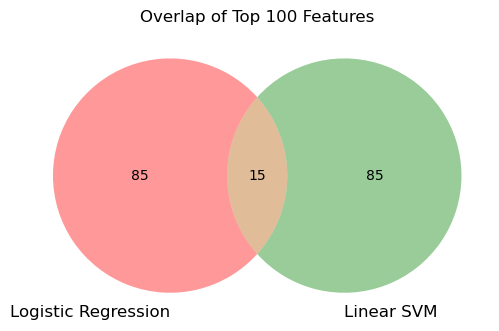

In [28]:
# --- Get top N features ---
top_n = 100

# Logistic Regression
coefs_lr = lr.coef_
if coefs_lr.shape[0] > 1:
    abs_lr = pd.DataFrame(np.abs(coefs_lr), columns=selected_features).mean(axis=0)
else:
    abs_lr = pd.Series(np.abs(coefs_lr[0]), index=selected_features)
top_lr = abs_lr.sort_values(ascending=False).head(top_n).index

# Linear SVM
coefs_svm = svc_final.coef_
if coefs_svm.shape[0] > 1:
    abs_svm = pd.DataFrame(np.abs(coefs_svm), columns=selected_features).mean(axis=0)
else:
    abs_svm = pd.Series(np.abs(coefs_svm[0]), index=selected_features)
top_svm = abs_svm.sort_values(ascending=False).head(top_n).index

# --- Compare ---
overlap = set(top_lr).intersection(set(top_svm))
print(f"\nTop {top_n} features overlap: {len(overlap)} features")
print("Overlapping features:")
print(sorted(list(overlap)))

# Optional: Save as DataFrame
df_overlap = pd.DataFrame({
    "Feature": sorted(list(overlap)),
    "LogReg Rank": [list(top_lr).index(f)+1 for f in overlap],
    "SVM Rank": [list(top_svm).index(f)+1 for f in overlap]
}).sort_values(["LogReg Rank", "SVM Rank"])

print("\nRanked Overlapping Features:")
print(df_overlap)

# Optional: Plot Venn diagram
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
venn2([set(top_lr), set(top_svm)], set_labels=("Logistic Regression", "Linear SVM"))
plt.title(f"Overlap of Top {top_n} Features")
plt.savefig("top_feature_overlap_venn.png", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
# --- Create DataFrames of ranked features ---
top_n = 100

# Logistic Regression absolute coefficients
coefs_lr = lr.coef_
if coefs_lr.shape[0] > 1:
    abs_lr = pd.DataFrame(np.abs(coefs_lr), columns=selected_features).mean(axis=0)
else:
    abs_lr = pd.Series(np.abs(coefs_lr[0]), index=selected_features)
top_lr = abs_lr.sort_values(ascending=False).head(top_n)

# Linear SVM absolute coefficients
coefs_svm = svc_final.coef_
if coefs_svm.shape[0] > 1:
    abs_svm = pd.DataFrame(np.abs(coefs_svm), columns=selected_features).mean(axis=0)
else:
    abs_svm = pd.Series(np.abs(coefs_svm[0]), index=selected_features)
top_svm = abs_svm.sort_values(ascending=False).head(top_n)

# --- Find overlapping features ---
overlap_features = set(top_lr.index).intersection(set(top_svm.index))

# --- Build comparison table ---
comparison_df = pd.DataFrame({
    "Feature": list(overlap_features),
    "LR Rank": [top_lr.index.get_loc(f) + 1 for f in overlap_features],
    "LR Coefficient": [top_lr[f] for f in overlap_features],
    "SVM Rank": [top_svm.index.get_loc(f) + 1 for f in overlap_features],
    "SVM Coefficient": [top_svm[f] for f in overlap_features]
})

# Sort by average rank
comparison_df["Avg Rank"] = (comparison_df["LR Rank"] + comparison_df["SVM Rank"]) / 2
comparison_df = comparison_df.sort_values("Avg Rank")

# --- Display preview ---
print("\nTop overlapping features:")
print(comparison_df.head(10).to_string(index=False))

# --- Save as CSV ---
comparison_df.to_csv("overlapping_top_features.csv", index=False)

# --- Optional: Save as Excel ---
# comparison_df.to_excel("overlapping_top_features.xlsx", index=False)



Top overlapping features:
Feature  LR Rank  LR Coefficient  SVM Rank  SVM Coefficient  Avg Rank
  SFTA3        7        0.016510        15         0.007851      11.0
RNF144B       46        0.015126         3         0.008403      24.5
Cluster       18        0.015717        34         0.007331      26.0
  SFTA2        5        0.016688        47         0.007108      26.0
 SFTPA1       31        0.015513        46         0.007115      38.5
 SPOCK3        8        0.016205        69         0.006886      38.5
   CDX1       67        0.014783        10         0.008079      38.5
 SRD5A2       89        0.014470        29         0.007540      59.0
 SFTPA2       79        0.014558        41         0.007163      60.0
 IGSF10       48        0.015092        87         0.006726      67.5


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceW

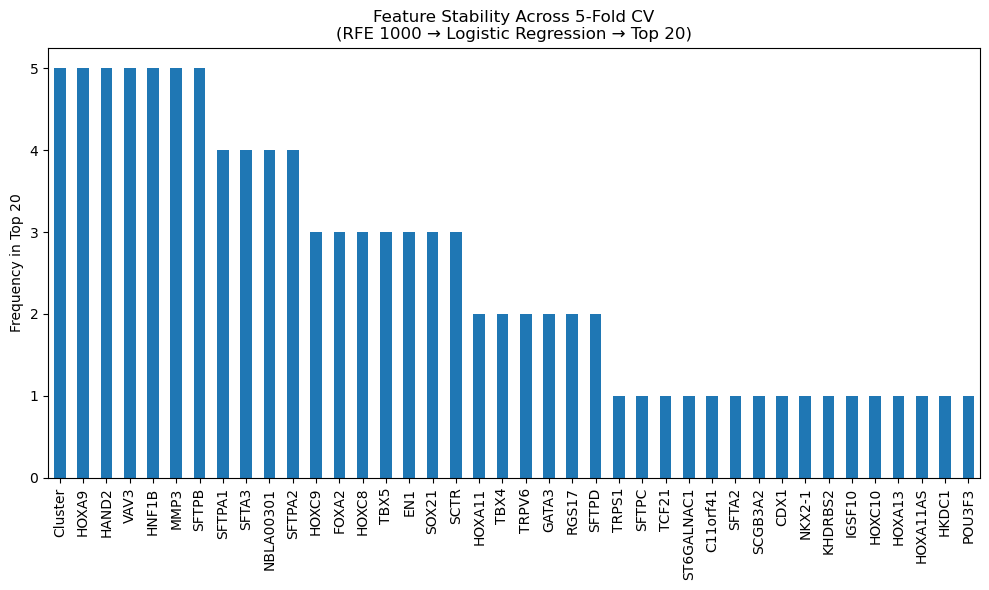

In [32]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ----- 1. Prepare data -----
X = df.drop(columns=['Class'])
y = df['Class']
top_k_features = 1000
top_n_stability = 20
k = 5

# === Prepare feature count tracking ===
all_features = X.columns
feature_counts = pd.Series(0, index=all_features)

# === Set up cross-validation ===
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train_raw, y_train = X.iloc[train_idx], y[train_idx]
    X_test_raw = X.iloc[test_idx]

    # === Standardize features ===
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    # === Feature selection with RFE ===
    svc_base = LinearSVC(penalty="l2", dual=False, max_iter=10000, random_state=42)
    rfe = RFE(estimator=svc_base, n_features_to_select=top_k_features, step=0.1)
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_test_rfe = rfe.transform(X_test_scaled)

    selected_feature_mask = rfe.get_support()
    selected_feature_names = X.columns[selected_feature_mask]

    # === Logistic Regression on selected features ===
    model = LogisticRegression(
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        multi_class='ovr'
    )
    model.fit(X_train_rfe, y_train)

    # === Get average absolute coefficients across classes ===
    avg_abs_coefs = np.abs(model.coef_).mean(axis=0)
    top_indices = np.argsort(avg_abs_coefs)[-top_n_stability:]
    top_features = selected_feature_names[top_indices]

    # === Update feature stability counter ===
    feature_counts[top_features] += 1

# === Filter to features that appeared at least once ===
stable_features = feature_counts[feature_counts > 0].sort_values(ascending=False)

# === Plot ===
plt.figure(figsize=(10, 6))
stable_features.plot(kind='bar')
plt.title(f'Feature Stability Across {k}-Fold CV\n(RFE 1000 → Logistic Regression → Top {top_n_stability})')
plt.ylabel('Frequency in Top 20')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Top 100 Features Selected:
 ['AGTR2', 'ANO3', 'AZGP1', 'C10orf99', 'C13orf18', 'C17orf73', 'C1orf180', 'C2orf89', 'C5orf52', 'C8orf74', 'CCNJL', 'CDX1', 'CEACAM7', 'CEACAM8', 'CHIA', 'CHST5', 'CLCA1', 'CYP2B6', 'ELFN2', 'EPB41L2', 'EPHB2', 'EPHX3', 'F5', 'FABP1', 'FABP2', 'FAM55A', 'FLJ32063', 'FOXA2', 'GALNT8', 'GCNT2', 'GGTLC1', 'GKN1', 'GKN2', 'GPA33', 'GPR128', 'GRIN2B', 'HAND2', 'HEPH', 'HOXA11AS', 'HOXA11', 'HOXA13', 'HOXA9', 'HOXC10', 'HOXC5', 'KCNQ3', 'KHDRBS2', 'KRT7', 'LMO3', 'LOC441869', 'LOC646627', 'LY6G6D', 'LY6G6E', 'MAB21L2', 'MBIP', 'MEP1A', 'MS4A12', 'MUC21', 'NAPSA', 'NBLA00301', 'NCRNA00114', 'NEK3', 'NKX2-1', 'NOX1', 'ONECUT1', 'PLA2G1B', 'PLUNC', 'POTEA', 'REG3A', 'RETNLB', 'RGS17', 'ROS1', 'SCGB3A2', 'SCTR', 'SFTA1P', 'SFTA2', 'SFTA3', 'SFTPA1', 'SFTPA2', 'SFTPB', 'SFTPC', 'SFTPD', 'SH3TC2', 'SHD', 'SLC26A3', 'SLC26A9', 'SLC45A3', 'SLC6A7', 'SLC9A4', 'SOX21', 'TBX4', 'TBX5', 'TCP10L2', 'TDGF3', 'TTPA', 'USP44', 'VAV3', 'VIP', 'XKRX', 'ZNF512B', 'Cluster']


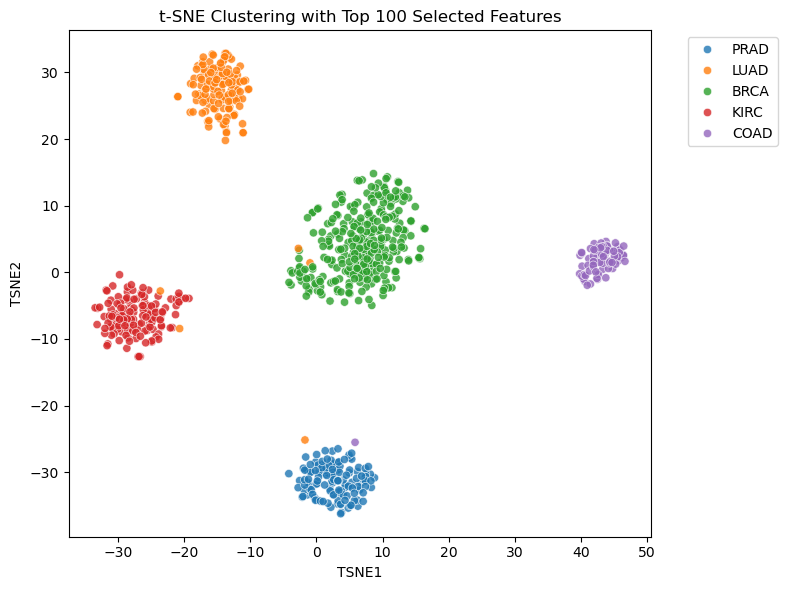

In [35]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# === Input your data ===
X = df.drop("Class", axis=1)  
y = df["Class"]            

# === Standardize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === RFE to select top 100 features ===
svc = LinearSVC(penalty="l2", dual=False, max_iter=10000, random_state=42)
rfe = RFE(estimator=svc, n_features_to_select=100, step=0.1)
X_selected = rfe.fit_transform(X_scaled, y)

# Optional: Get the feature names of selected features
selected_mask = rfe.get_support()
selected_feature_names = X.columns[selected_mask]
print("Top 100 Features Selected:\n", selected_feature_names.tolist())

# === t-SNE ===
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

# === Prepare for plotting ===
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["Class"] = y.values

# === Plot and Save ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Class", palette="tab10", alpha=0.8)
plt.title("t-SNE Clustering with Top 100 Selected Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot to file
plt.savefig("tsne_top100_features.png", dpi=300, bbox_inches='tight')

# Display on screen
plt.show()


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Top 100 Features Selected:
 ['AGTR2', 'ANO3', 'AZGP1', 'C10orf99', 'C13orf18', 'C17orf73', 'C1orf180', 'C2orf89', 'C5orf52', 'C8orf74', 'CCNJL', 'CDX1', 'CEACAM7', 'CEACAM8', 'CHIA', 'CHST5', 'CLCA1', 'CYP2B6', 'ELFN2', 'EPB41L2', 'EPHB2', 'EPHX3', 'F5', 'FABP1', 'FABP2', 'FAM55A', 'FLJ32063', 'FOXA2', 'GALNT8', 'GCNT2', 'GGTLC1', 'GKN1', 'GKN2', 'GPA33', 'GPR128', 'GRIN2B', 'HAND2', 'HEPH', 'HOXA11AS', 'HOXA11', 'HOXA13', 'HOXA9', 'HOXC10', 'HOXC5', 'KCNQ3', 'KHDRBS2', 'KRT7', 'LMO3', 'LOC441869', 'LOC646627', 'LY6G6D', 'LY6G6E', 'MAB21L2', 'MBIP', 'MEP1A', 'MS4A12', 'MUC21', 'NAPSA', 'NBLA00301', 'NCRNA00114', 'NEK3', 'NKX2-1', 'NOX1', 'ONECUT1', 'PLA2G1B', 'PLUNC', 'POTEA', 'REG3A', 'RETNLB', 'RGS17', 'ROS1', 'SCGB3A2', 'SCTR', 'SFTA1P', 'SFTA2', 'SFTA3', 'SFTPA1', 'SFTPA2', 'SFTPB', 'SFTPC', 'SFTPD', 'SH3TC2', 'SHD', 'SLC26A3', 'SLC26A9', 'SLC45A3', 'SLC6A7', 'SLC9A4', 'SOX21', 'TBX4', 'TBX5', 'TCP10L2', 'TDGF3', 'TTPA', 'USP44', 'VAV3', 'VIP', 'XKRX', 'ZNF512B', 'Cluster']


/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/CedarsAIcampus/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


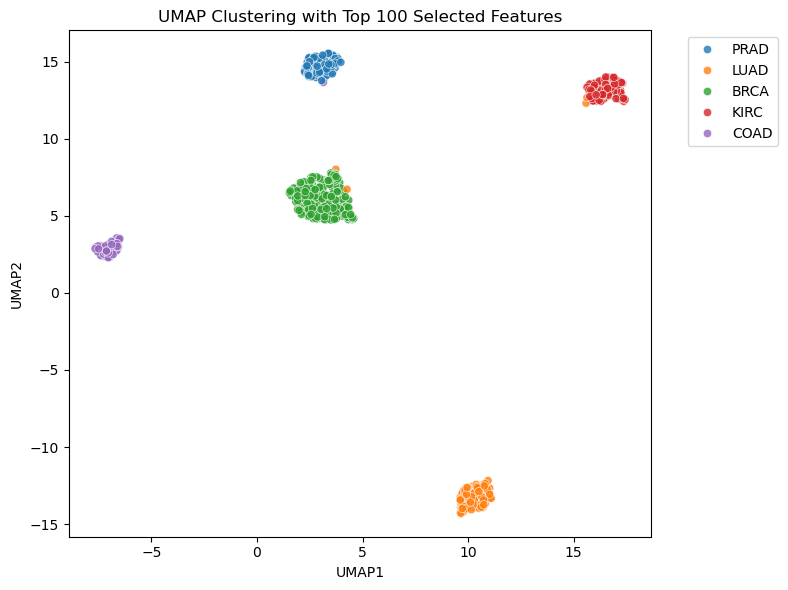

In [36]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# === Input your data ===
X = df.drop("Class", axis=1)  # All features
y = df["Class"]               # Cancer labels

# === Standardize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === RFE to select top 100 features ===
svc = LinearSVC(penalty="l2", dual=False, max_iter=10000, random_state=42)
rfe = RFE(estimator=svc, n_features_to_select=100, step=0.1)
X_selected = rfe.fit_transform(X_scaled, y)

# Optional: Get selected feature names
selected_mask = rfe.get_support()
selected_feature_names = X.columns[selected_mask]
print("Top 100 Features Selected:\n", selected_feature_names.tolist())

# === UMAP Embedding ===
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_selected)

# === Prepare DataFrame for plotting ===
umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
umap_df["Class"] = y.values

# === Plot and Save ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="Class", palette="tab10", alpha=0.8)
plt.title("UMAP Clustering with Top 100 Selected Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("umap_top100_features.png", dpi=300, bbox_inches='tight')
plt.show()
